In [2]:
# Matplotlib default setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [3]:
data = pd.read_excel('../data.xlsx',sheet_name='Sheet1').sort_values('era',ascending=True)

In [98]:
def calc_diff(x,col,n):
    sort_dir = False if col == 'k7' else True
    
    mean_year = data.loc[data['season'] == x['season'],col]\
        .sort_values(ascending=sort_dir)\
        .head(n)\
        .mean()

    return x[col] - mean_year

In [99]:
data['era-diff'] = data.apply(lambda x: calc_diff(x,'era',10), axis=1)
data['k7-diff'] = data.apply(lambda x: calc_diff(x,'k7',10), axis=1)

In [101]:
def colorize(x):
    if (x['player'] == 'Rachel Garcia'):
        return 'blue'
    elif (x['player'] == 'Cat Osterman'):
        return 'orange'
    elif (x['player'] == 'Monica Abbott'):
        return 'green'
    elif (x['player'] == 'Kelly Barnhill'):
        return 'brown'
    else:
        return 'lightgrey'

Text(0,0.5,'k7')

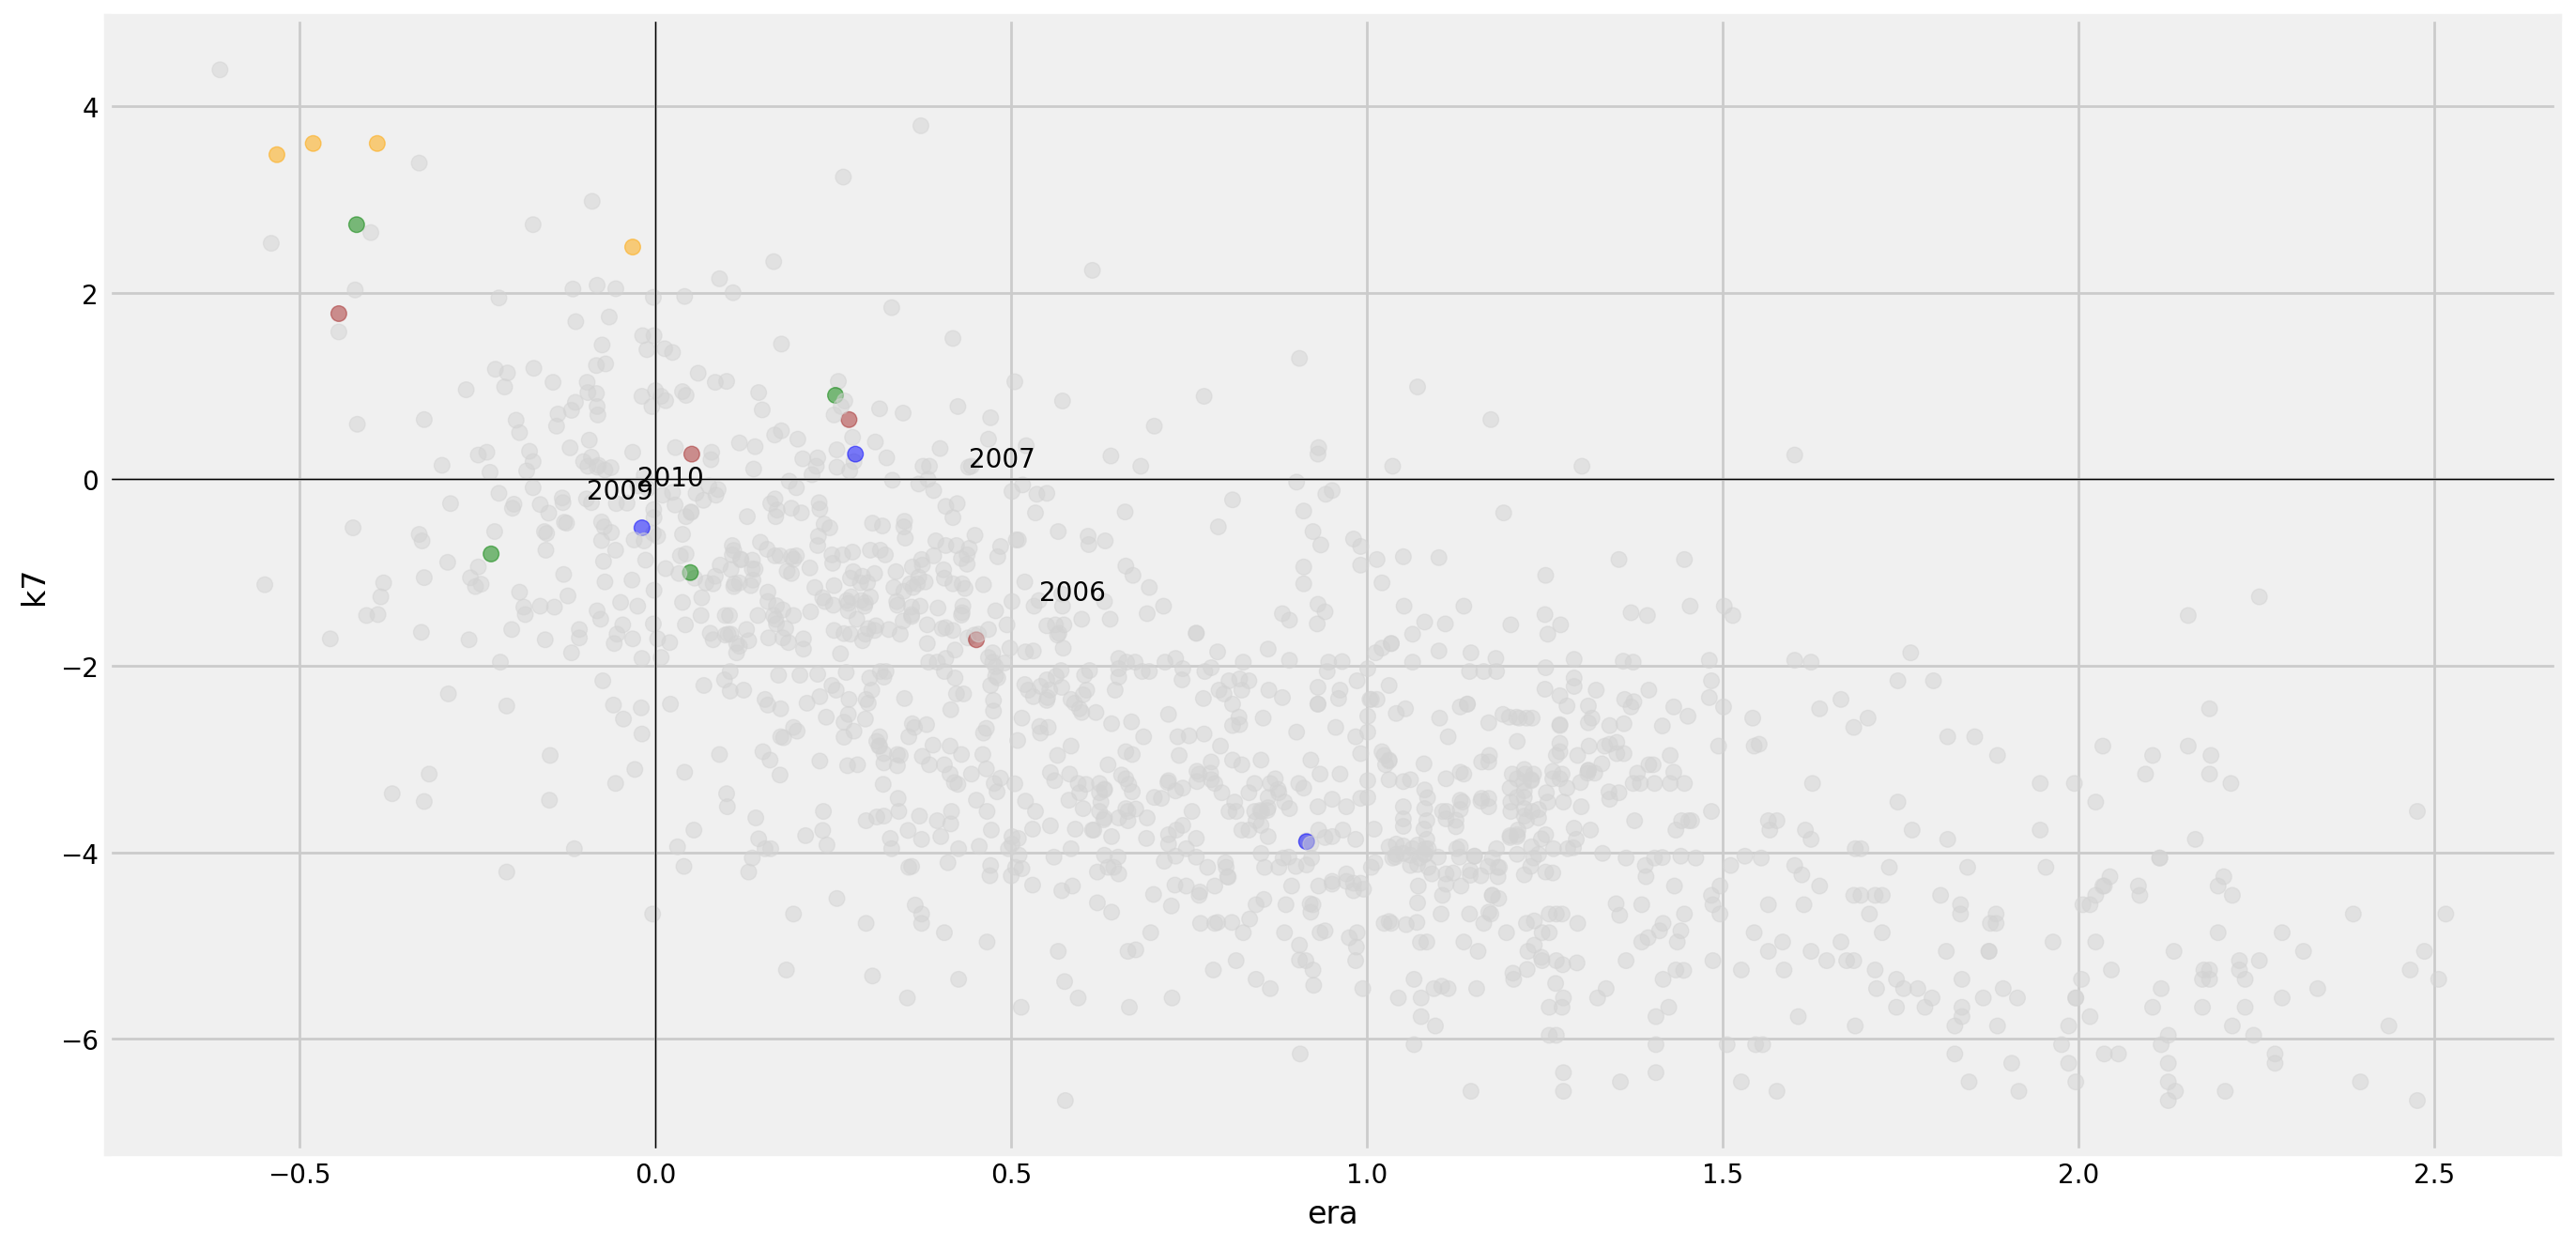

In [110]:
fig,axes = plt.subplots(1,1,figsize=(15,8),dpi=(200))

axes.axhline(0,0,lw=0.5,c='black')
axes.axvline(0,0,lw=0.5,c='black')

axes.scatter(data['era-diff'],data['k7-diff'],\
             c=data.apply(lambda x: colorize(x),axis=1),\
             alpha=0.5)

axes.set_xlabel('era')
axes.set_ylabel('k7')

fig.savefig('../img-exports/scatterplot.pdf')

In [ ]:
# players = ['Cat Osterman','Rachel Garcia','Monica Abbott','Kelly Barnhill', 'Danielle Henderson']
# players = ['Danielle Lawrie']

# d = data[data['player'].isin(players)]

# d = data[data['era-diff'] < -0.5]

# for i,dd in d.iterrows():
#     axes.text(dd['era-diff'],dd['k7-diff'],s=dd['season'])